# Use of the Integrated van't Hoff Equation to Treat Two-State Protein Denaturation
David M. Morgan, Ph.D.<br>
For the Colbert Laboratory at NDSU, with my thanks and best wishes.

## Thermodynamics of Protein Denaturation
Consider the equilibrium between the native (N) and random coil (C) states of a protein:
$$N\rightleftharpoons C$$
and recall that the equilibrium constant for this process is:
$$K=\frac{C}{N}$$
in which:<br>
&emsp;C&emsp;&emsp;is the concentration of the random coil species, and<br>
&emsp;N&emsp;&emsp;is the concentration of the native species.<br><br>
At low temperatures, the equilibrium constant will have values much smaller than 1, indicating that most of the protein molecules are found in the native state at those temeperatures. In contrast, at high temperatures, the equilibrium constant will have values much larger than 1, indicating that the population of the random coil state predominates over that of the native state. At intermediate temperatures, the equilibrium constant will have intermediate values, and at a particular temperature, the melting temperature $T_M$, the populations of native and random coil states will be precisely equal and the equilibrium constant will have a value of 1.
## The van't Hoff Equation
The temperature dependence of the equilibrium constant is given by the linear form of the [van't Hoff equation](https://en.wikipedia.org/wiki/Van_%27t_Hoff_equation):$^\dagger$
$$ln(K)=-\frac{\Delta H^{\circ}}{R}\frac{1}{T}+\frac{\Delta S^{\circ}}{R}$$

If the value of the equilibrium constant is known at any one temperature, its value at another temperature, e.g. $T_M$, may be estimated using the integrated form of the equation:$^\ddagger$
$$ln(\frac{K}{K_{T_M}})=-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Because, in this case $K_{T_M}=1$, this simplifies even further:
$$ln(K)=-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})$$
<br>
To make use of this equation to estimate protein-specific parameters like melting temperature and enthalpy of denaturation, it is necessary to establish a relationship between the denaturation equilibrium constant at an arbitrary temperature and an observable signal that varies as a function of temperature. Usually this signal is spectroscopic.<br><br>

$\dagger$: It is assumed that $\Delta H$ and $\Delta S$ are temperature-independent, which is often reasonable over small $\Delta T$; in general $\Delta H$ and $\Delta S$ are temperature-dependent functions of the heat capacity.<br><br>
$\ddagger$: To prepare Brautigam's version, factor $\frac{1}{T}$ out of the parenthetical term in what follows.

## Total and Fractional Protein Concentrations & 
## Reformulation of the Equilibrium Constant

In a two-state protein denaturation equilibrium consisting of an N state and a C state, let:<br><br>
&emsp;T&emsp;&emsp;&nbsp;&nbsp;&nbsp;be the total protein concentration, the sum of that in each of states N and C<br>
&emsp;$f_N$&emsp;&emsp;be the fraction of total protein found in state N, and<br>
&emsp;$f_C$&emsp;&emsp;be the fraction of total protein found in state C.<br><br>
Algebraically:<br>
$$T=N+C$$
$$f_N=\frac{N}{T}=\frac{N}{N+C}$$
$$f_C=\frac{C}{T}=\frac{C}{N+C}$$
$$f_N+f_C=\frac{N}{N+C}+\frac{C}{N+C}=\frac{N+C}{N+C}=1$$
<br>
If:
$$K=\frac{C}{N}$$
then, substituting $f_C*T$ and $f_N*T$ for $C$ and $N$ respectively, provides:
$$K=\frac{f_C*T}{f_N*T}$$
and $T$ drops out to afford:
$$K=\frac{f_C}{f_N}$$
Substituting $1-f_N$ for $f_C$ eliminates an unnecessary parameter:
$$K=\frac{1-f_N}{f_N}$$



## Fractional Protein Concentrations &
## The Observed Signal
Because the signal that is observed at any moment must derive from either the native conformation of the protein or its random coil conformation, it must be a linear combination of each of these signals weighted by the fraction of total protein molecules found in each of those states. Algebraically:
$$\sigma=f_N\sigma_N+f_C\sigma_C$$
Again $f_C$ is eliminated as above:
$$\sigma=f_N\sigma_N+(1-f_N)\sigma_C$$
from which an expression isolating $f_N$ may be prepared:
$$f_N=\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}$$
Substitution of this result into that from the section above for the equilibrium constant provides:
$$K=\frac{1-\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}{\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}$$
This rearranges to the tractable:
$$K=\frac{\sigma_N-\sigma}{\sigma-\sigma_C}$$
which may be substituted into the integrated form of the van't Hoff equation:
$$ln(K)=-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})$$
to provide:
$$ln(\frac{\sigma_N-\sigma}{\sigma-\sigma_C})=-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Exponentiation yields:
$$\frac{\sigma_N-\sigma}{\sigma-\sigma_C}=e^{-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})}$$
from which an expression for the observed signal in terms of temperature and fittable parameters $\Delta H^{\circ}$ and $T_M$ may be prepared:
$$\sigma=\frac{\sigma_N+\sigma_Ce^{-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})}}{1+e^{-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})}}$$

<br><br>Here are computations for a plot with $\sigma_N$=0, $\sigma_C$=9, $\Delta H$ = 100 kJ/mol and $T_M$ = 52$^{\circ}$C.

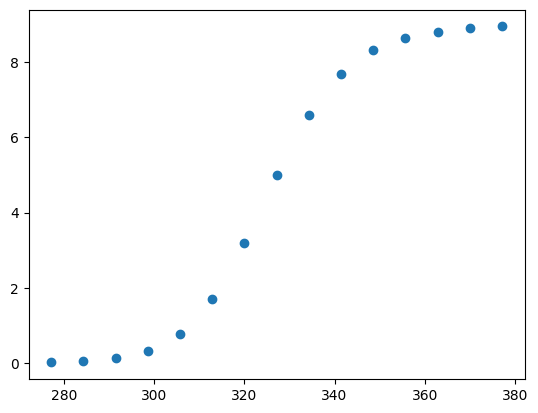

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def sigmafunc(T, sigmaN, sigmaC, deltaH, TM, R=8.3144):
    Q=np.exp(-deltaH/R*(1/T-1/TM))
    return ((sigmaN+sigmaC*Q)/(1+Q))

mintemp = 4 # degrees C
maxtemp = 104
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
T = np.linspace(mintemp, maxtemp, 15)

sigmaN = 0 # arbitrary
sigmaC = 9 # arbitrary, but != sigmaN
deltaH = 100000 # Joules per mol, because if undeclared, R=8.3144 Joules per (Kelvin mol)
TM = 52 # degrees C
TM += 273.15 # conversion to Kelvin

sigma = sigmafunc(T, sigmaN, sigmaC, deltaH, TM)
plt.scatter(T,sigma)
plt.show()

## Application to Experimental Data:
Here is a scatter plot of actual data CD data at 217 nm for the PupB NTSD L74A mutant in the temperature range ~290 K to ~350 K:

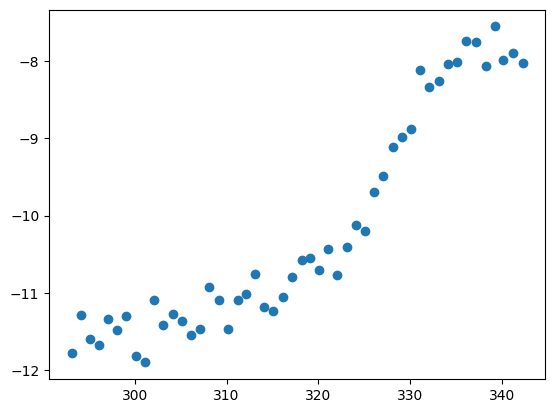

In [2]:
basedir = '/home/david/gh/intro_curve_fitting_python'
datadir = basedir+'/thermal_denaturation_data'
fn = datadir+'/PupB NTSD L74A 25 uM 217 nm F.csv'
os.chdir(datadir)

# incidentally, here is another way to read csv data
my_data = np.genfromtxt(fn, delimiter=',')

# slicing syntax '[:,[i]]' = 'the i'th column'; 
# note the implied 'from the 0th row to the last row' in the
# absence of values before and after the colon 
T = my_data[:,[0]].flatten()
y = my_data[:,[1]].flatten()
plt.scatter(T,y)
plt.show()


The lower temperature region shows a typical 'sloping' baseline.<br><br>
Although the fitting equation does not yet include appropriate corrections, I fit the data with it nonetheless to set up the exercise in F-statistics at the end of this document. Note that there are four adjustable (fittable) parameters in this equation: $\sigma_N$, $\sigma_C$, $\Delta H$, and $T_M$.
## Carry out the fit to the four-parameter version:

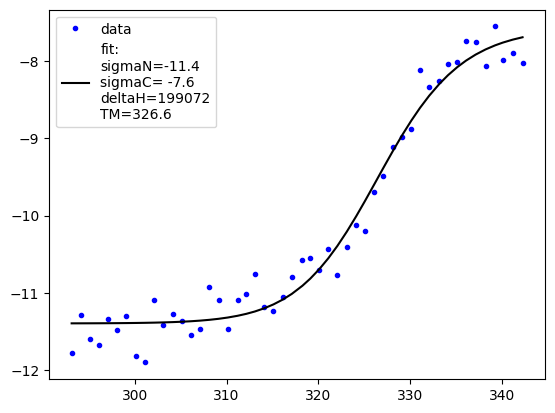

In [3]:
# sigmafunc(T, sigmaN, sigmaC, deltaH, TM, R=8.3144):
popt, pcov = curve_fit(sigmafunc, T, y, p0=[-11, -7.5, 28561, 329])

plt.plot(T, y, 'b.', label='data')
plt.plot(T, sigmafunc(T, *popt), 'k-',
        label='fit:\nsigmaN=%5.1f\nsigmaC=%5.1f\ndeltaH=%5.0f\nTM=%5.1f' % tuple(popt))
plt.legend()
plt.show()

## Compute residuals:

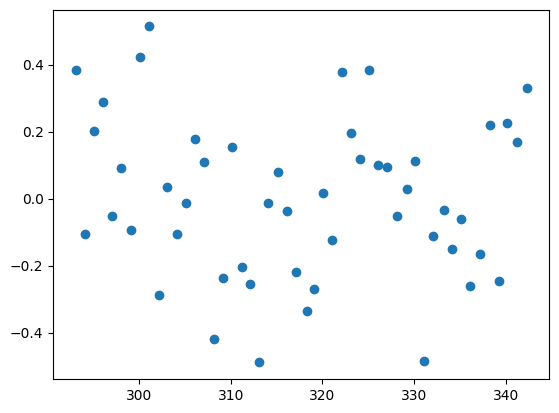

In [4]:
# calculate residuals:
sigmafuncresiduals = sigmafunc(T, *popt) - y

# residuals plot
plt.scatter(T, sigmafuncresiduals)
plt.show()

## Compute R$^2$:

In [5]:
sigmafuncssres = np.sum(np.square(sigmafuncresiduals))
sigmafuncsstot = np.sum(np.square(y-np.mean(y)))
Rsquared = 1-sigmafuncssres/sigmafuncsstot
print('Rsquared: %1.3f' % Rsquared)

Rsquared: 0.972


## Addition of Sloping Baseline Corrections to the Fitting Function:
Now, let's extend the model to encode the equations of lines in place of the constants $\sigma_N$ and $\sigma_C$. These substitutions are simple:
$$\sigma_N\rightarrow m_1T+b_1$$
and
$$\sigma_C\rightarrow m_2T+b_2$$
and produce:

$$\sigma=\frac{m_1T+b_1+(m_2T+b_2)e^{-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})}}{1+e^{-\frac{\Delta H^{\circ}}{R}(\frac{1}{T}-\frac{1}{T_M})}}$$<br><br>

Note that there are six fittable parameters in this equation: $m_1$, $b_1$, $m_2$, $b_2$, $\Delta H$, and $T_M$.

## Define the revised function:

In [6]:
def sigmaslopingbaselines(T, m1, b1, m2, b2, deltaH, TM, R=8.3144):
    line1 = m1*T+b1
    line2 = m2*T+b2
    Q=np.exp(-deltaH/R*(1/T-1/TM))
    return ((line1+line2*Q)/(1+Q))

## Estimate parameters for the low and high temperature lines:

In [7]:
# get the first 20 points for a low temp line
eks = T[:20]
why = y[:20]
def line(x, m, b):
    return m*x+b

ltlineparam, pcov = curve_fit(line, eks, why)
print('low temperature line:\n\tslope: %1.4f\tintercept: %2.2f' % tuple(ltlineparam))

# get the last 12 points for a high temp line
eks = T[-12:]
why = y[-12:]

htlineparam, pcov = curve_fit(line, eks, why)
print('high temperature line:\n\tslope: %1.4f\tintercept: %2.2f' % tuple(htlineparam))

low temperature line:
	slope: 0.0255	intercept: -19.11
high temperature line:
	slope: 0.0321	intercept: -18.78


## Carry out the fit to the six-parameter version:

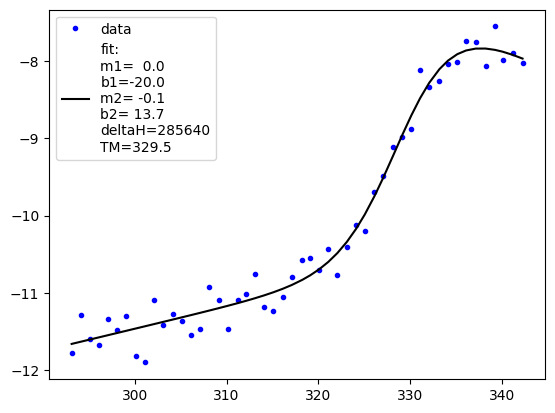

In [8]:
# def sigmaslopingbaselines(T, m1, b1, m2, b2, deltaH, TM, R=8.3144):
p=[ltlineparam[0], ltlineparam[1], htlineparam[0], htlineparam[1], 100000, 335]
popt, pcov = curve_fit(sigmaslopingbaselines, T, y, p0=p)

plt.plot(T, y, 'b.', label='data')
plt.plot(T, sigmaslopingbaselines(T, *popt), 'k-',
        label='fit:\nm1=%5.1f\nb1=%5.1f\nm2=%5.1f\nb2=%5.1f\ndeltaH=%5.0f\nTM=%5.1f' % tuple(popt))
plt.legend()
plt.show()

## Calculate residuals:

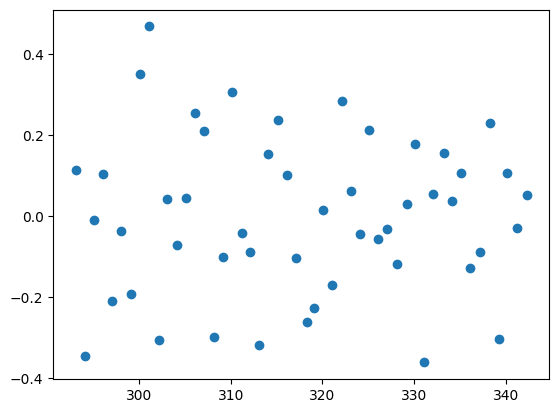

In [9]:
sigmaslopingresiduals = sigmaslopingbaselines(T, *popt) - y

# residuals plot
plt.scatter(T, sigmaslopingresiduals)
plt.show()

## Compute R$^2$:

In [10]:
sigmaslopingssres = np.sum(np.square(sigmaslopingresiduals))
sigmafuncsstot = np.sum(np.square(y-np.mean(y)))
Rsquared = 1-sigmaslopingssres/sigmafuncsstot
print('Rsquared: %1.3f' % Rsquared)

Rsquared: 0.981


By comparison of <i>R$^2$</i>, there is a marginally better fit to the data using the six-parameter equation than using the four-parameter equation. But, as the number of parameters increases, so does <i>R$^2$</i>. An F-test is a more sophisticated way to compare the two fits. The [Wikipedia](https://en.wikipedia.org/wiki/F-test) page provides a good introduction. 
## Carry out F-test for Comparison of Nested Models
Define a function which computes the F-statistic for comparing variances from fitting 'full' and 'reduced' models to data. The number of parameters in the 'full' model is <i>larger</i> than the number of parameters in the 'reduced' model. Having computed the statistic, the function evaluates the cumulative distribution function for the appropriate F-distribution. The F-statistic and its associated ($p\_value$) are returned.<br><br>In this application of F-testing, the null hypothesis is 'the reduced model is correct;' at high $p\_value$, the null hypothesis is <i>rejected</i> with level of confidence $1-p\_value$.<br><br>
The F-statistic is computed as follows:
$$F=\frac{\frac{\sum\chi_R^2-\sum\chi_F^2}{p-q}}{\frac{\sum\chi_F^2}{N-q}}$$
in which:<br>
|Symbol|Meaning|
|------|-------|
|$\sum\chi_R^2$|summed squared residuals for the fit with the reduced model |
|$\sum\chi_F^2$|summed squared residuals for the fit with the full model |
|$p$|number of parameters in the full model |
|$q$|number of parameters in the reduced model |
|$N$|number of residuals, <i>i.e.</i>, number of data points |

The cumulative distribution function is computed for the F-distribution with $p-q$ and $N-q$ degrees of freedom. 

In [11]:
def ftest(resred, resfull, dofred, doffull):
    if not len(resred) == len(resfull):
        return 'the lengths of the residuals arrays must be the same.'
    else:
        ssered=np.sum(np.square(resred))
        ssefull=np.sum(np.square(resfull))
        N = len(resred)
        # note that (dofred-doffull) = p-q
        num = ((ssered-ssefull)/(dofred-doffull))
        denom = ((ssefull)/(doffull))
        f = num/denom
        p = stats.f.cdf(f, dofred-doffull, doffull)
        return f, p

# the 'reduced' model is sigmafunc
resred = sigmafuncresiduals
# the 'full' model is sigmaslopingbaselines
resfull = sigmaslopingresiduals

# dofred
# number of degrees of freedom in the residuals data set for the 
# reduced model: 
# N-(number of parameters in reduced model)
dofred = -4 + len(resred)
# doffull
# similarly defined
doffull = -6 + len(resfull)

f,p = ftest(resred, resfull, dofred, doffull)
print(f'degrees of freedom, reduced residuals: {dofred}')
print(f'degrees of freedom, full residuals: {doffull}')
print(f'p-q: {dofred-doffull}')
print(f'F-statistic: {f}')
print(f'p_value: {p}')

degrees of freedom, reduced residuals: 46
degrees of freedom, full residuals: 44
p-q: 2
F-statistic: 10.718185992472641
p_value: 0.9998385878559887


This provides strong statistical support for the superiority of the 'full' model, in this case. 